# 0: Import packages

In [1]:
from PIL import Image, ImageFile #pip install Pillow==9.4.0
import sys
import os
import numpy as np
import logging
import glob
import subprocess
import json
import pandas as pd

from ImageCrop import ImagePreprocessor
from SpotterWrapper import Spotter, PolygonVisualizer
from IPython.display import display
from shapely.geometry import Polygon

logging.basicConfig(level=logging.INFO)
Image.MAX_IMAGE_PIXELS=None
ImageFile.LOAD_TRUNCATED_IMAGES = True

c:\Users\HP\anaconda3\envs\mapKurator\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1: Specify filepaths

In [2]:
# Name folders for raw data and processed data
map_data_topfolder = 'raw_maps_20231024'
map_strec_topfolder = 'processed/strec'

for fp in [map_strec_topfolder]:
    if not os.path.isdir(fp):
        os.makedirs(fp)

# IMPORTANT! Locate spotter directory and detectron weights
git_clone_location = 'C:/Users/HP/'
model_weights = git_clone_location + 'detectron2-main/detectron2/checkpoint/model_v2_en.pth'
spotter_directory = git_clone_location + 'mapkurator-spotter-main/spotter-v2'
spotter_config = spotter_directory + '/configs/PALEJUN/Finetune/Base-SynthMap-Polygon.yaml'

# 2: Crop all jpeg maps in (user defined) map_data_topfolder

In [3]:
def pyramid_scan(img_path, output_dir, save_each_layer=False):
    image = Image.open(img_path)
    image_preprocessor = ImagePreprocessor(image, overlapping_tolerance=0.2, num_layers=3, min_patch_resolution=256, max_patch_resolution=2048)
    image_preprocessor.process()
    print("preprocessing done")
    spotter = Spotter(spotter_config, model_weights, confidence_thresh=0.8, draw_thresh=0.85)
    all_layer_results = []

    base_image_batch, base_offset_xs, base_offset_ys = image_preprocessor.get_image_patches(0)
    vis = PolygonVisualizer()
    vis.canvas_from_patches(base_image_batch, base_offset_xs, base_offset_ys)

    for i in range(image_preprocessor.num_layers):
        # If you want to save for each layer, uncomment the following line
        # image_preprocessor.save_patches(os.path.join(output_dir, f'layer_{i}_patches'), layer=i)

        image_batch, offset_xs, offset_ys = image_preprocessor.get_image_patches(i)
        spotter.load_batch(image_batch, offset_xs, offset_ys)
        results = spotter.inference_batch()
        all_layer_results.extend(results)

        #all_layer_offset_xs.extend(offset_xs)
        #all_layer_offset_ys.extend(offset_ys)

        if save_each_layer == True:
            vis.draw(results).save(os.path.join(output_dir, f'combined_tagged_{i}.png'))
            vis.save_json(results, os.path.join(output_dir, f'combined_tagged_{i}.json'))
        else:
            pass

    vis.draw(all_layer_results).save(os.path.join(output_dir, f'combined_tagged_all_layers.png'))
    vis.save_json(all_layer_results, os.path.join(output_dir, f'combined_tagged_all_layers.json'))

# Run crop on all maps
for map_data_subfolder in next(os.walk(map_data_topfolder))[1]:
    jpeg_list = glob.glob(map_data_topfolder + '/' + map_data_subfolder + '/*.jpeg')
    if len(jpeg_list) != 1:
        print(map_data_subfolder + " failed. Please ensure there is exactly 1 file with extension .jpeg in the folder.")
    else:
        map_image = jpeg_list[0].split("\\")[1]
        if map_data_subfolder in ['1874_saunders']: # '1818_sieber', '1874_saunders', '1845_kiepert']: #,,]: #'1858_vandevelde', '1847_tobler', '1845_kiepert'
            img_path = map_data_topfolder + '/' + map_data_subfolder + "/" + map_image
            map_name = os.path.basename(img_path).split('.')[0] # get the map name without extension
            output_dir = os.path.join(map_strec_topfolder, map_name)
            if not os.path.isdir(output_dir):
                os.makedirs(output_dir)
            pyramid_scan(img_path, output_dir, save_each_layer=True)
            logging.info('Done cropping %s' %img_path )

1818_sieber failed. Please ensure there is exactly 1 file with extension .jpeg in the folder.
1822_richardson failed. Please ensure there is exactly 1 file with extension .jpeg in the folder.
1823_westphal failed. Please ensure there is exactly 1 file with extension .jpeg in the folder.
1837_dufour failed. Please ensure there is exactly 1 file with extension .jpeg in the folder.
1846_krafft failed. Please ensure there is exactly 1 file with extension .jpeg in the folder.
1846_vandevelde_2 failed. Please ensure there is exactly 1 file with extension .jpeg in the folder.
1848_gadow failed. Please ensure there is exactly 1 file with extension .jpeg in the folder.
1852_lange failed. Please ensure there is exactly 1 file with extension .jpeg in the folder.
1855_pierotti failed. Please ensure there is exactly 1 file with extension .jpeg in the folder.
1870_warren failed. Please ensure there is exactly 1 file with extension .jpeg in the folder.
1873_illes failed. Please ensure there is exactl

preprocessing done


INFO:detectron2.checkpoint.detection_checkpoint:[DetectionCheckpointer] Loading from C:/Users/HP/detectron2-main/detectron2/checkpoint/model_v2_en.pth ...
INFO:fvcore.common.checkpoint:[Checkpointer] Loading from c:/Users/HP/detectron2-main/detectron2/checkpoint/model_v2_en.pth ...
c:\Users\HP\anaconda3\envs\mapKurator\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


tensor([50, 53, 51, 51, 41, 33, 46, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
        96, 96, 96, 96, 96, 96, 96]) rec
text RUSSIAN
tensor([33, 52, 44, 33, 51, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
        96, 96, 96, 96, 96, 96, 96]) rec
text ATLAS
tensor([35, 73, 83, 84, 69, 82, 78, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
        96, 96, 96, 96, 96, 96, 96]) rec
text Cistern
tensor([55, 41, 44, 44, 41, 33, 45, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
        96, 96, 96, 96, 96, 96, 96]) rec
text WILLIAM
tensor([50, 47, 33, 36, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
        96, 96, 96, 96, 96, 96, 96]) rec
text ROAD
tensor([51, 45, 41, 52, 40,  7, 51, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
        96, 96, 96, 96, 96, 96, 96]) rec
text SMITH'S
tensor([42, 33, 38, 38, 33, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
        96, 96, 96, 96, 96, 96, 96]) rec
text JAFFA
tensor([35, 73, 83, 84, 69, 82, 82, 96, 96, 96, 96, 96, 96, 96, 96, 9

INFO:root:Done cropping raw_maps_20231024/1874_saunders/saunders_1874.jpeg


1883_sandreczki failed. Please ensure there is exactly 1 file with extension .jpeg in the folder.
1894_schick failed. Please ensure there is exactly 1 file with extension .jpeg in the folder.
1911_vincent failed. Please ensure there is exactly 1 file with extension .jpeg in the folder.


# 3: Label Combination

# 4: Evaluation

full map is 6528 pixels wide by 8694 pixels high.
 displaying crop:


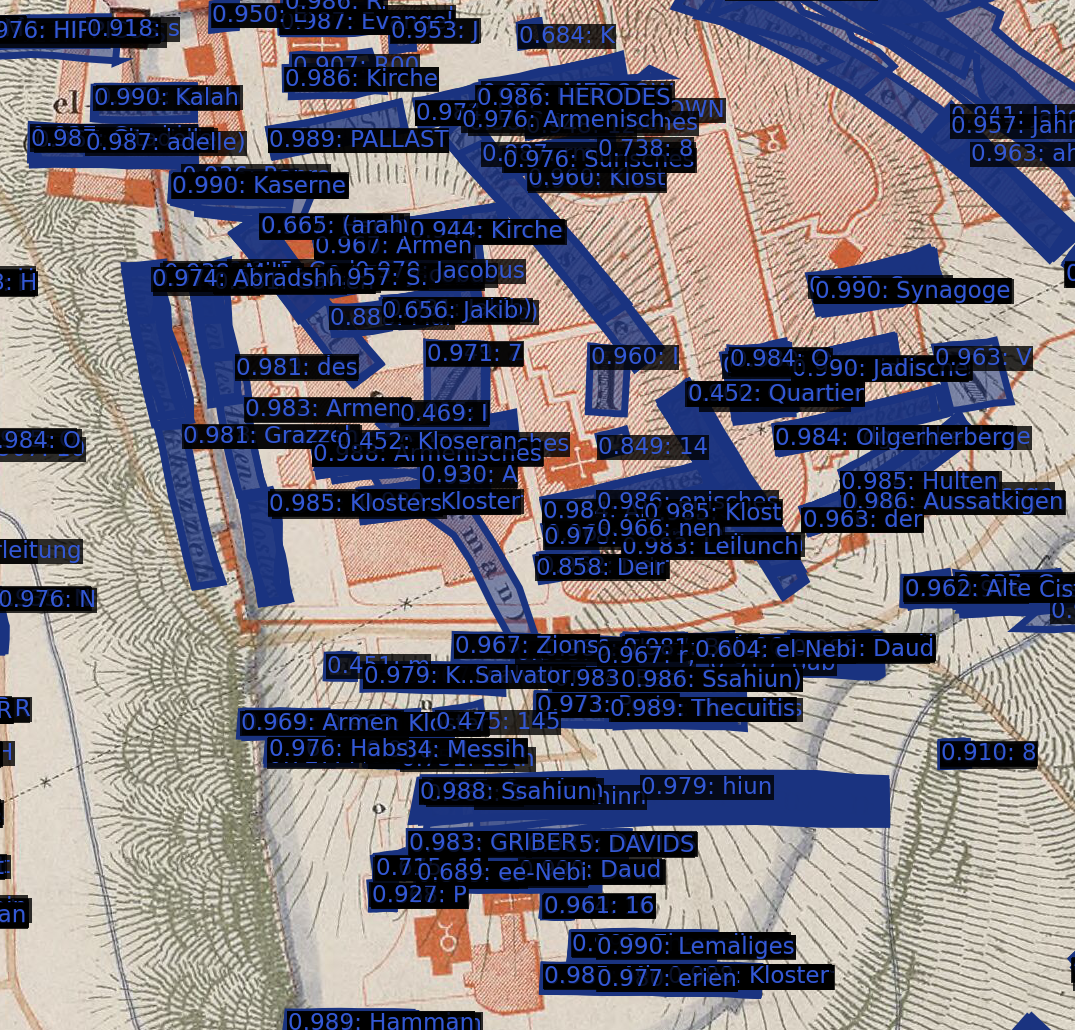

In [2]:
from PIL import Image, ImageFile
import json 
import pandas as pd
from collections import Counter
from shapely.geometry import Polygon, MultiPolygon
from itertools import combinations
import scipy
import numpy as np


def visualize_crop(map_name_in_strec, raw_or_spotter, left_x, right_x, top_y, bottom_y):
    if raw_or_spotter == "raw":
        map_img = Image.open('processed/strec/' + map_name_in_strec + '/raw.jpeg') 
    elif raw_or_spotter == "spotter_0":
        map_img = Image.open('processed/strec/' + map_name_in_strec + '/combined_tagged_0.png')
    elif raw_or_spotter == "spotter_1":
        map_img = Image.open('processed/strec/' + map_name_in_strec + '/combined_tagged_1.png')
    elif raw_or_spotter == "spotter_2":
        map_img = Image.open('processed/strec/' + map_name_in_strec + '/combined_tagged_2.png')
    elif raw_or_spotter == "all":
        map_img = Image.open('processed/strec/' + map_name_in_strec + '/combined_tagged_all_layers.png')
    width, height = map_img.size
    print("full map is " + str(width) + " pixels wide by " + str(height) + " pixels high.\n displaying crop:")
    display(map_img.crop((left_x, top_y, right_x, bottom_y, )))

left_x = 2475
right_x = 3550
top_y = 4820
bottom_y = 5850

visualize_crop("kiepert_1845", "all", left_x, right_x, top_y, bottom_y)

In [4]:
# FUNCTIONS

## Load in (1) ground truth labels that were built using Via and (2) spotter labels
def load_ground_truth_labels(map_name_in_strec, multiline_handling, labels_on_fullsize_map=True):
    with open('dependencies/ground_truth_labels/' + map_name_in_strec + '.json') as f:
        gt_labels_tmp = json.load(f)
        gt_labels = pd.DataFrame([
            {
                'all_points_x': obs['shape_attributes']['all_points_x'],
                'all_points_y': obs['shape_attributes']['all_points_y'],
                'annotation': obs['region_attributes']['annotation'],
                'multiline_g': obs['region_attributes'].get('multiline_g', None)
            }
            for obs in gt_labels_tmp[list(gt_labels_tmp.keys())[0]]['regions']
        ])

    if multiline_handling == 'largest':
        gt_labels['annotation_length'] = gt_labels['annotation'].apply(len)
        tmp1 = gt_labels[gt_labels['multiline_g'].isnull()]
        tmp2 = gt_labels.dropna(subset=['multiline_g'])
        gt_labels = pd.concat([tmp2.loc[tmp2.groupby('multiline_g')['annotation_length'].idxmax()], tmp1])
    elif multiline_handling == 'components':
        gt_labels['annotation_length'] = gt_labels['annotation'].apply(len)
        tmp1 = gt_labels[gt_labels['multiline_g'].isnull()]
        tmp2 = gt_labels.dropna(subset=['multiline_g'])
        gt_labels = pd.concat([tmp2.loc[~tmp2.index.isin(tmp2.groupby('multiline_g')['annotation_length'].idxmax())], tmp1])
    return gt_labels

def load_spotter_labels(map_name_in_strec, layer_json_w_extension='combined_tagged_all_layers.json'):
    with open('processed/strec/' + map_name_in_strec + '/' + layer_json_w_extension) as f:
        spotter_labels_tmp = json.load(f)
    spotter_labels = pd.DataFrame(spotter_labels_tmp)
    spotter_labels = spotter_labels.rename(columns={'polygon_x':'all_points_x','polygon_y':'all_points_y'})
    return spotter_labels

## Retain a subset of labels based on crop coordinates
def coords_fail_condition(list, direction_for_drop, value, baseline):
    if baseline == 1:
        return 1
    else:
        if direction_for_drop == '<':
            num_coords_broke_rule = sum([0 if coord < value else 1 for coord in list])
        elif direction_for_drop == '>':
            num_coords_broke_rule = sum([0 if coord > value else 1 for coord in list])
        if num_coords_broke_rule > 0:
            return 1
        else:
            return 0
        
def retain_crop_labels_only(df, left_x, right_x, top_y, bottom_y):
    df['drop'] = 0
    df['drop'] = df.apply(lambda row: coords_fail_condition(row['all_points_x'], '>', left_x, row['drop']), axis=1)
    df['drop'] = df.apply(lambda row: coords_fail_condition(row['all_points_x'], '<', right_x, row['drop']), axis=1)
    df['drop'] = df.apply(lambda row: coords_fail_condition(row['all_points_y'], '>', top_y, row['drop']), axis=1)
    df['drop'] = df.apply(lambda row: coords_fail_condition(row['all_points_y'], '<', bottom_y, row['drop']), axis=1)
    df = df[df['drop'] == 0]
    print("retaining " + str(len(df)) + " labels fully inside crop area")
    return df

## Convert labels to polygon objects (df needs all_points_x and all_points_y cols)
def create_polygon_object(x_coords, y_coords):
    return Polygon(zip(x_coords, y_coords)).buffer(0) # buffer fixes errors that occur due to weird self-overlapping edges when manually labeling

def cast_coords_as_Polygons(df):
    df_copy = df.copy()
    df_copy.loc[:, 'label_polygons'] = df.apply(lambda row: create_polygon_object(row['all_points_x'], row['all_points_y']), axis=1)
    return df_copy

## Calculate and Match IoUs
def calculate_IoU_matrix(spotter_polygons, gt_polygons):
    IoU_matrix = []
    for sptr_poly in spotter_polygons:
        row = []
        for gt_poly in gt_polygons:
            intersection_area = sptr_poly.intersection(gt_poly).area
            union_area = sptr_poly.union(gt_poly).area
            iou = intersection_area / union_area if union_area > 0 else 0
            row.append(iou)
        IoU_matrix.append(row)
    return np.array(IoU_matrix)

def maximize_1to1_global_average(IoU_matrix):
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(IoU_matrix, maximize=True)
    return IoU_matrix[row_ind, col_ind].sum() / (IoU_matrix.shape[0] + IoU_matrix.shape[0] - 2 * len(row_ind))

def maximize_mto1_global_average(IoU_matrix):
    return np.sum(np.max(IoU_matrix, axis=1)) / IoU_matrix.shape[0]

## Full pipeline 
def display_geographic_accuracy(map_name_in_strec, multiline_handling, spotter_layer):
    print("\n------")
    print(map_name_in_strec + " | " + multiline_handling + " of multiline GT labels | spotter layer " + spotter_layer)
    print("------")
    gt_labels_full = load_ground_truth_labels(map_name_in_strec, multiline_handling)
    gt_labels_crop = retain_crop_labels_only(gt_labels_full, left_x, right_x, top_y, bottom_y)
    gt_labels_crop = cast_coords_as_Polygons(gt_labels_crop)
    gt_polys = gt_labels_crop['label_polygons']

    spotter_labels_full = load_spotter_labels(map_name_in_strec, spotter_layer)
    spotter_labels_crop = retain_crop_labels_only(spotter_labels_full, left_x, right_x, top_y, bottom_y)
    spotter_labels_crop = cast_coords_as_Polygons(spotter_labels_crop)
    spotter_polys = spotter_labels_crop['label_polygons']

    IoU_matrix = calculate_IoU_matrix(spotter_polys, gt_polys)
    print("Avg of 1:1 IoUs: " + str(maximize_1to1_global_average(IoU_matrix)))
    print("Avg of m:1 IoUs: " + str(maximize_mto1_global_average(IoU_matrix)))

In [3]:
print("Average IoU for text bounding boxes; unmatched boxes included in denominators.")
print("m:1 -> multiple spotter text boxes can be matched with a single ground truth text box")
print("")

for layer_s in ['combined_tagged_0', 'combined_tagged_1', 'combined_tagged_2', 'combined_tagged_all_layers']:
    display_geographic_accuracy("kiepert_1845", "largest", layer_s + ".json")
    display_geographic_accuracy("kiepert_1845", "components", layer_s + ".json")

Average IoU for text bounding boxes; unmatched boxes included in denominators.
m:1 -> multiple spotter text boxes can be matched with a single ground truth text box


------
kiepert_1845 | largest of multiline GT labels | spotter layer combined_tagged_0.json
------
retaining 14 labels fully inside crop area
retaining 32 labels fully inside crop area
Avg of 1:1 IoUs: 0.04903594816737514
Avg of m:1 IoUs: 0.09262334240051329

------
kiepert_1845 | components of multiline GT labels | spotter layer combined_tagged_0.json
------
retaining 52 labels fully inside crop area
retaining 32 labels fully inside crop area


C:\Users\HP\AppData\Local\Temp\ipykernel_16788\2658979776.py:84: RuntimeWarning: divide by zero encountered in scalar divide
  return IoU_matrix[row_ind, col_ind].sum() / (IoU_matrix.shape[0] + IoU_matrix.shape[0] - 2 * len(row_ind))


Avg of 1:1 IoUs: inf
Avg of m:1 IoUs: 0.3376431579839494

------
kiepert_1845 | largest of multiline GT labels | spotter layer combined_tagged_1.json
------
retaining 14 labels fully inside crop area
retaining 94 labels fully inside crop area
Avg of 1:1 IoUs: 0.023163548432043154
Avg of m:1 IoUs: 0.14056845088969933

------
kiepert_1845 | components of multiline GT labels | spotter layer combined_tagged_1.json
------
retaining 52 labels fully inside crop area
retaining 94 labels fully inside crop area
Avg of 1:1 IoUs: 0.250163678986927
Avg of m:1 IoUs: 0.4610923054305189

------
kiepert_1845 | largest of multiline GT labels | spotter layer combined_tagged_2.json
------
retaining 14 labels fully inside crop area
retaining 176 labels fully inside crop area
Avg of 1:1 IoUs: 0.013348497555761719
Avg of m:1 IoUs: 0.12326932405947165

------
kiepert_1845 | components of multiline GT labels | spotter layer combined_tagged_2.json
------
retaining 52 labels fully inside crop area
retaining 176 

Label selection part 3: merge


In [99]:
def intersection_over_minimum(obj1, obj2):
    if (isinstance(obj1, Polygon) or isinstance(obj1, MultiPolygon)) and (isinstance(obj2, Polygon) or isinstance(obj2, MultiPolygon)):
        IoM = obj1.intersection(obj2).area / min(obj1.area, obj2.area)
    elif isinstance(obj1, str) and isinstance(obj2, str):
        obj1 = obj1.lower()
        obj2 = obj2.lower()
        cntr1 = Counter(obj1)
        cntr2 = Counter(obj2)
        global_char_set = set(cntr1.keys()) | set(cntr2.keys())
        IoM = sum(min(cntr1[char], cntr2[char]) for char in global_char_set) / min(len(obj1), len(obj2))
    else:
        print(obj1, obj2)
        print("both inputs must be of the same type (Polygon or string)")
        IoM = np.nan
    return IoM

def IoMs(label1, label2):
    poly1 = label1[0]
    text1 = label1[1]
    poly2 = label2[0]
    text2 = label2[1]
    poly_IoU = intersection_over_minimum(poly1, poly2)
    text_IoU = intersection_over_minimum(text1, text2)
    return (poly_IoU, text_IoU)

def update_P_matrix(df_w_labels, threshold, P = None):
    labels = df_w_labels['labels']
    if P == None:
        P = {}
    to_combine = []
    for i, j in combinations(labels.index, 2):
        if i not in P.keys():
            P[i] = {}
        if j in P[i].keys():
            pass
        else:
            similarity = IoMs(labels[i], labels[j])
            P[i][j] = similarity
            if min(similarity) > threshold:
                to_combine.append((i,j))
    return P, to_combine

def combine_labels(label1, label2):
    poly1 = label1[0]
    text1 = label1[1]
    poly2 = label2[0]
    text2 = label2[1]
    poly_new = poly1.union(poly2)
    text_new = text1 if len(text1) > len(text2) else text2
    return (poly_new, text_new)

def amalgamate_labels(df, P, to_combine):
    for pair in to_combine:
        if str(pair[0]) in df.index and str(pair[1]) in df.index:
            new_label = combine_labels(df.loc[str(pair[0])]['labels'], df.loc[str(pair[1])]['labels'])
            df.loc[str(int(df.index[-1]) + 1)] = [new_label]
            df = df.drop([str(pair[0])]).copy()
            df = df.drop([str(pair[1])]).copy()
            try:
                P.pop(pair[0])
            except:
                pass
            try:
                P.pop(pair[1])
            except:
                pass
        else: # one of the polygons has already been swallowed so no combination can no longer occur
            pass
    return df, P

def amalgamate_labels_wrapper(df, threshold):
    pre_amal = 0
    post_amal = len(df)
    while pre_amal - post_amal != 0:
        pre_amal = post_amal
        try: # init P if variable not yet assigned. otherwise update.
            P
            P, to_combine = update_P_matrix(df, threshold, P)
        except:
            P, to_combine = update_P_matrix(df, threshold)
        print(str(pre_amal) + " labels.")
        df, P = amalgamate_labels(df, P, to_combine)
        post_amal = len(df)
    print("Amalgamation completed with " + str(pre_amal) + " labels.")
    return df

df = load_spotter_labels("kiepert_1845", "combined_tagged_all_layers.json")
df = cast_coords_as_Polygons(df)
df['labels'] = df.apply(lambda row: (row['label_polygons'], row['text']), axis=1)
df = df[['labels']]
df = amalgamate_labels_wrapper(df, 0.75)

6145 labels.
3818 labels.
2760 labels.
2398 labels.
2368 labels.
2362 labels.
2358 labels.
2356 labels.
2355 labels.
Amalgamation completed with 2355 labels.
